In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

/Users/luchicla/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data_file = 'forbes_billionaires.csv'

In [6]:
df = pd.read_csv(data_file, index_col='Rank')
df.head()

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education,Self_made
Rank,,,,,,,,,,,
1,Jeff Bezos,177,United States,Amazon,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
2,Elon Musk,151,United States,"Tesla, SpaceX",49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
3,Bernard Arnault & family,150,France,LVMH,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
4,Bill Gates,124,United States,Microsoft,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
5,Mark Zuckerberg,97,United States,Facebook,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


In [7]:
df.describe()

,Age,Children
count,2625.000000,1552.000000
mean,63.278095,2.978093
std,13.483659,1.618569
min,18.000000,1.000000
25%,54.000000,2.000000
50%,63.000000,3.000000
75%,73.000000,4.000000
max,99.000000,23.000000


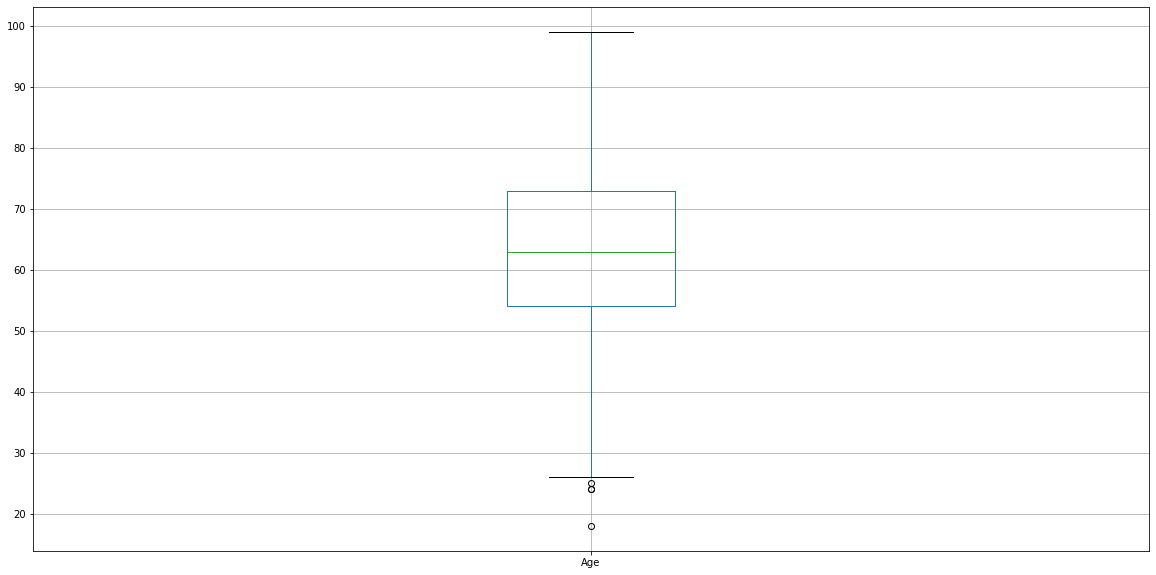

In [10]:
plt.figure(figsize=(20, 10))
df.boxplot('Age')
plt.show()

In [12]:
df[df['Age'] < 28]

,Name,NetWorth,Country,Source,Age,Residence,Citizenship,Status,Children,Education,Self_made
Rank,,,,,,,,,,,
925,Kevin David Lehmann,3.3,Germany,drugstores,18.0,NaN,Germany,NaN,NaN,NaN,False
1299,Austin Russell,2.4,United States,★,26.0,"Los Altos, California",United States,Single,NaN,"Drop Out, Stanford University",True
2035,Wang Zelong,1.5,China,chemicals,24.0,"Jiaozuo, China",China,Married,NaN,NaN,False
2141,Alexandra Andresen,1.4,Norway,investments,24.0,"Oslo, Norway",Norway,Single,NaN,NaN,False
2141,Katharina Andresen,1.4,Norway,investments,25.0,"Oslo, Norway",Norway,Single,NaN,NaN,False


In [15]:
p_under_28 = df[df['Age'] < 28]['Age'].count() / len(df)
p_over_28 = 1 - p_under_28
print('Probability of u28: %s; probability of o28: %s' % (p_under_28, p_over_28))

Probability of u28: 0.0018148820326678765; probability of o28: 0.9981851179673321


In [19]:
p_over_85 = df[df['Age'] > 85]['Age'].count() / len(df)
print('Probability of o90: %s' % p_over_85)

Probability of o90: 0.05190562613430127


In [25]:
p_over_90 = df[df['Age'] > 90]['Age'].count() / len(df)
print('Probability of o90: %s' % p_over_90)

Probability of o90: 0.019963702359346643


In [33]:
mean_age = df[(df['Age'] >= 28) & (df['Age'] <= 90)]['Age'].mean()
std_age = df[(df['Age'] >= 28) & (df['Age'] <= 90)]['Age'].std()
print('Average age: %s; Std age: %s' % (mean_age, std_age))

Average age: 62.71423001949318; Std age: 12.780175673725388


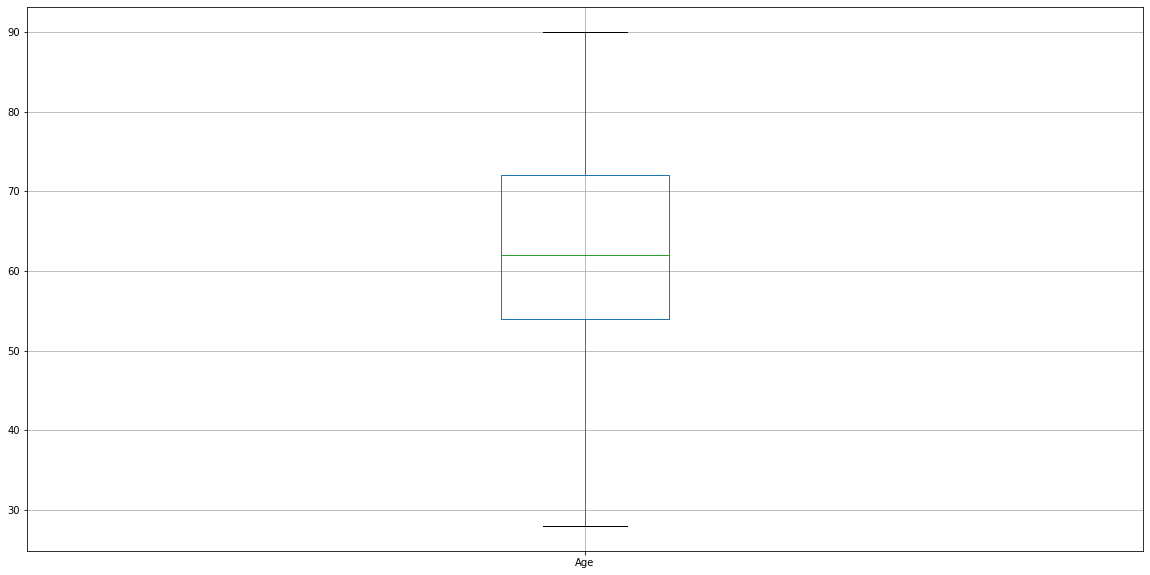

In [28]:
df2 = df[(df['Age'] >= 28) & (df['Age'] <= 90)]
plt.figure(figsize=(20, 10))
df2.boxplot('Age')
plt.show()

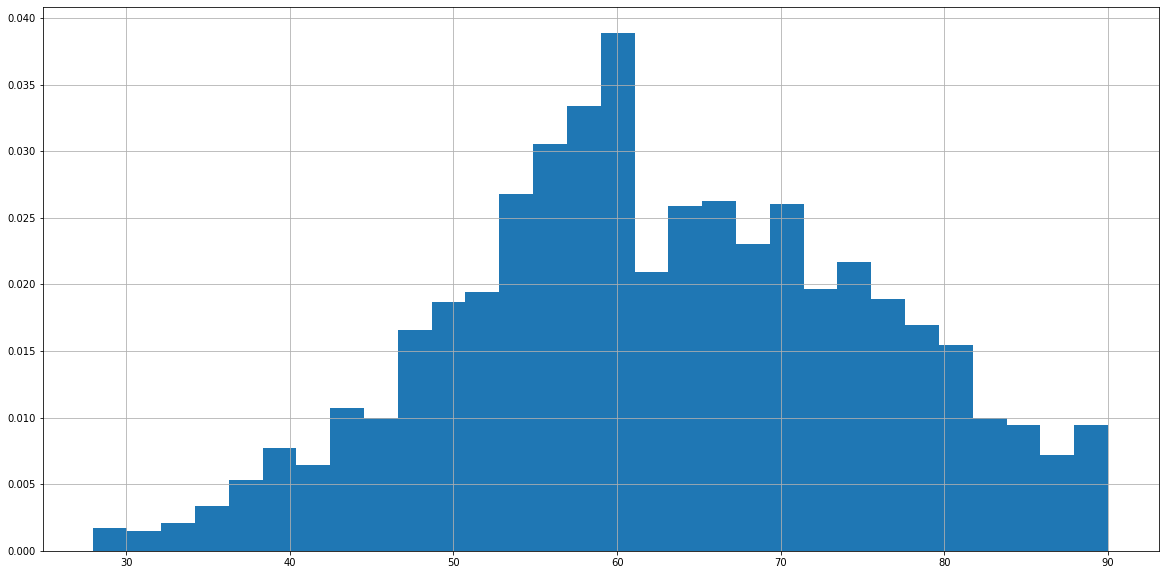

In [39]:
plt.figure(figsize=(20, 10))
df2['Age'].hist(bins=30, density=True)
plt.show()

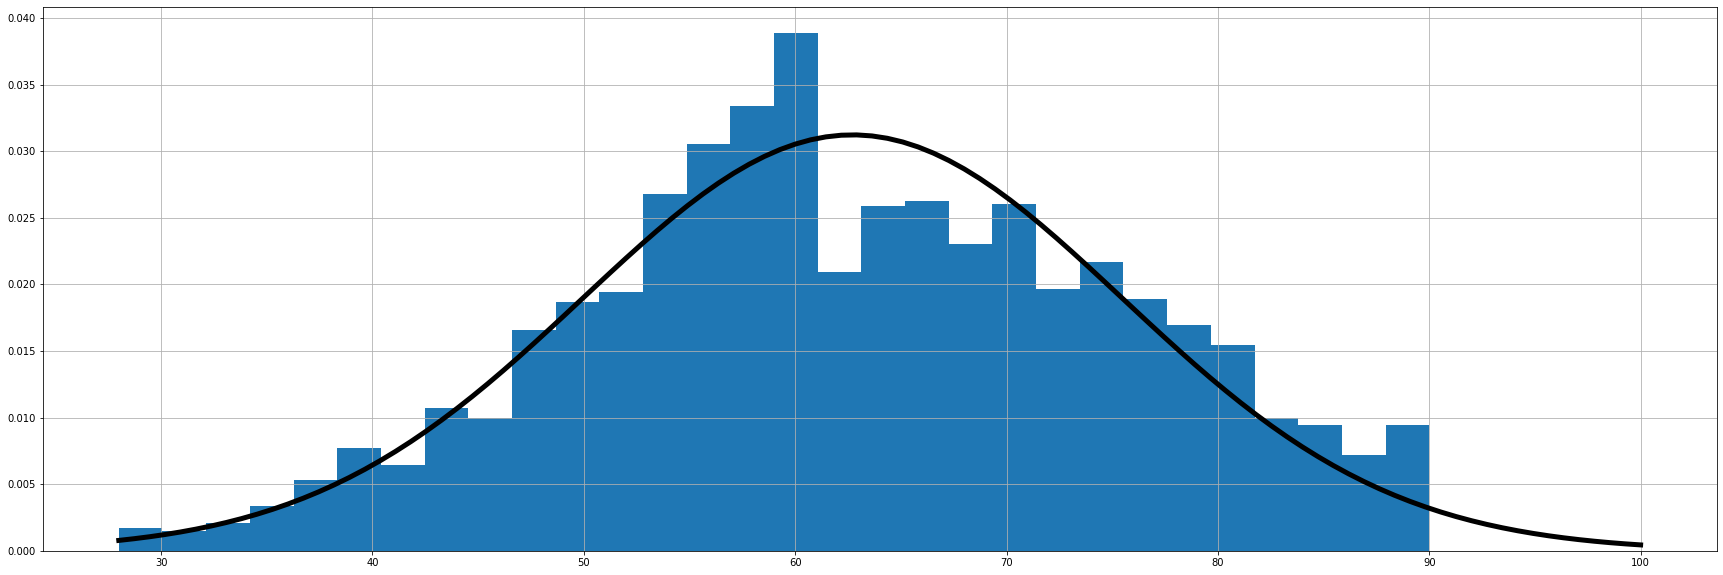

In [44]:
from scipy.stats import norm
mu, std = norm.fit(df2['Age'])
# x = np.linspace(df2['Age'].min(), df2['Age'].max(), 100)
x = np.linspace(df2['Age'].min(), 100, 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(30, 10))
df2['Age'].hist(bins=30, density=True)
plt.plot(x, p, 'k', linewidth=5)
plt.show()

In [49]:
print('Estimated probability of age == 78: %s' % (norm.pdf(78, mu, std)))
print('Estimated probability of age == 15: %s' % (norm.pdf(15, mu, std)))
print('Estimated probability of age == 99: %s' % (norm.pdf(99, mu, std)))
print('Estimated probability of age == 63: %s' % (norm.pdf(63, mu, std)))
print('Estimated probability of age >= 78: %s' % (1-norm.cdf(78, mu, std)))

Estimated probability of age == 78: 0.015265050400338794
Estimated probability of age == 15: 2.927707841209548e-05
Estimated probability of age == 99: 0.0005537458918815365
Estimated probability of age == 63: 0.03121399116972318
Estimated probability of age >= 78: 0.11579240423147752
